# Customer Support Ticket Efficiency & SLA Analysis

This notebook focuses on data cleaning, feature engineering, SLA analysis, visualization.
(SLA - Service Level Agreement)


In [61]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [69]:
import os
print(os.getcwd())

C:\Users\asus


In [4]:
os.listdir()


['.arduinoIDE',
 '.cache',
 '.gitconfig',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.keras',
 '.lesshst',
 '.matplotlib',
 '.ms-ad',
 '.node-red',
 '.redhat',
 '.rustup',
 '.streamlit',
 '.VirtualBox',
 '.vscode',
 '01_data_understanding.ipynb.ipynb',
 'AppData',
 'Application Data',
 'Contacts',
 'Cookies',
 'CrossDevice',
 'Desktop',
 'Documents',
 'Downloads',
 'Excersices -  ML(Virtusa)',
 'Favorites',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'Microsoft',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TM.blf',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'OneDrive - Sri Lanka Institute of Information Technology',
 'Postman',
 'PrintHood',
 'Recent',
 'Sales_Analysis.ipynb',
 

In [6]:
df = pd.read_csv(r"D:\DA_Practice\Customer-Support-SLA-Analysis\data\raw_tickets.csv")

In [7]:
df.head()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,General Inquiry,low,de,Crash,Technical,Bug,Hardware,Resolution,Outage,Documentation,NaN
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,NaN,NaN,NaN,NaN
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,NaN,NaN
3,Krankenhaus-Dienstleistung-Problem,Ein Medien-Daten-Sperrverhalten trat aufgrund ...,Zurück zur E-Mail-Beschwerde über den Sperrver...,Incident,Customer Service,high,de,Security,Breach,Login,Maintenance,Incident,Resolution,Feedback,NaN
4,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,Compliance,Breach,Documentation,Guidance,NaN,NaN


In [8]:
df.shape

(20000, 15)

In [9]:
df.columns

Index(['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language',
       'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subject   18539 non-null  object
 1   body      19998 non-null  object
 2   answer    19996 non-null  object
 3   type      20000 non-null  object
 4   queue     20000 non-null  object
 5   priority  20000 non-null  object
 6   language  20000 non-null  object
 7   tag_1     20000 non-null  object
 8   tag_2     19954 non-null  object
 9   tag_3     19905 non-null  object
 10  tag_4     18461 non-null  object
 11  tag_5     13091 non-null  object
 12  tag_6     7351 non-null   object
 13  tag_7     3928 non-null   object
 14  tag_8     1907 non-null   object
dtypes: object(15)
memory usage: 2.3+ MB


In [11]:
df.isnull().sum()

subject      1461
body            2
answer          4
type            0
queue           0
priority        0
language        0
tag_1           0
tag_2          46
tag_3          95
tag_4        1539
tag_5        6909
tag_6       12649
tag_7       16072
tag_8       18093
dtype: int64

In [12]:
base_df = df.copy()

Data Cleaning

In [13]:
base_df["ticket_id"] = range(1, len(base_df) + 1)

In [14]:
base_df["category"] = base_df["type"]
base_df["department"] = base_df["queue"]

In [15]:
base_df["priority"] = base_df["priority"].str.lower().str.strip()

In [16]:
base_df["description"] = base_df["subject"] + " " + base_df["body"]

In [17]:
base_df["language"] = base_df["language"]

In [18]:
cols_to_drop = [
    "answer", "tag_1", "tag_2", "tag_3", "tag_4",
    "tag_5", "tag_6", "tag_7", "tag_8"
]
base_df = base_df.drop(columns=cols_to_drop)

In [19]:
base_df.columns

Index(['subject', 'body', 'type', 'queue', 'priority', 'language', 'ticket_id',
       'category', 'department', 'description'],
      dtype='object')

In [20]:
# Columns to keep
final_columns = [
    "ticket_id",
    "category",
    "department",
    "priority",
    "language",
    "description"
]

base_df = base_df[final_columns]

In [21]:
base_df.columns

Index(['ticket_id', 'category', 'department', 'priority', 'language',
       'description'],
      dtype='object')

In [22]:
base_df.to_csv(r"D:\DA_Practice\Customer-Support-SLA-Analysis\data\base_tickets.csv", index=False)

Feature Engineering

In [23]:
base_df["priority"].value_counts()

priority
medium    8144
high      7801
low       4055
Name: count, dtype: int64

In [24]:
base_df["priority"] = base_df["priority"].str.lower().str.strip()

In [25]:
np.random.seed(42)

urgent_mask = (base_df["priority"] == "high") & (np.random.rand(len(base_df)) < 0.1)
base_df.loc[urgent_mask, "priority"] = "urgent"

In [27]:
base_df["priority"].value_counts()

priority
medium    8144
high      6984
low       4055
urgent     817
Name: count, dtype: int64

In [28]:
base_df.columns

Index(['ticket_id', 'category', 'department', 'priority', 'language',
       'description'],
      dtype='object')

In [29]:
agents = [f"Agent_{i}" for i in range(1, 16)]  # 15 agents

In [30]:
np.random.seed(42)
base_df["agent_id"] = np.random.choice(agents, size=len(base_df))

In [35]:
base_df.columns

Index(['ticket_id', 'category', 'department', 'priority', 'language',
       'description', 'agent_id', 'created_at'],
      dtype='object')

In [36]:
start_date = pd.to_datetime("2024-01-01")
end_date = pd.to_datetime("2024-06-30")

base_df["created_at"] = pd.to_datetime(
    np.random.randint(
        start_date.value // 10**9,
        end_date.value // 10**9,
        size=len(base_df)
    ),
    unit="s"
)

In [37]:
base_df = base_df.sort_values("created_at").reset_index(drop=True)

In [38]:
base_df.columns

Index(['ticket_id', 'category', 'department', 'priority', 'language',
       'description', 'agent_id', 'created_at'],
      dtype='object')

In [39]:
sla_rules = {
    "urgent": {"response": 1, "resolution": 8},
    "high": {"response": 2, "resolution": 24},
    "medium": {"response": 4, "resolution": 48},
    "low": {"response": 24, "resolution": 72}
}

In [40]:
np.random.seed(42)

def generate_first_response(row):
    sla_hours = sla_rules[row["priority"]]["response"]
    
    # response time varies around SLA
    response_delay = np.random.normal(loc=sla_hours * 0.8, scale=sla_hours * 0.5)
    response_delay = max(0.1, response_delay)  # minimum response
    
    return row["created_at"] + timedelta(hours=response_delay)

base_df["first_response_at"] = base_df.apply(generate_first_response, axis=1)

In [41]:
def generate_resolution_time(row):
    sla_hours = sla_rules[row["priority"]]["resolution"]
    
    resolution_delay = np.random.normal(loc=sla_hours * 0.9, scale=sla_hours * 0.6)
    resolution_delay = max(1, resolution_delay)  # minimum resolution
    
    return row["created_at"] + timedelta(hours=resolution_delay)

base_df["resolved_at"] = base_df.apply(generate_resolution_time, axis=1)

In [ ]:
#Calculate actual performance metrics.

In [43]:
#First Response Time (Hours)
base_df["first_response_time_hours"] = (
    (base_df["first_response_at"] - base_df["created_at"])
    .dt.total_seconds() / 3600
)

In [47]:
#Resolution Time (Hours)
base_df["resolution_time_hours"] = (
    (base_df["resolved_at"] - base_df["created_at"])
    .dt.total_seconds() / 3600
)

In [45]:
#SLA Breach Detection
#Add SLA Limits to Each Ticket
base_df["sla_response_hours"] = base_df["priority"].apply(
    lambda p: sla_rules[p]["response"]
)

base_df["sla_resolution_hours"] = base_df["priority"].apply(
    lambda p: sla_rules[p]["resolution"]
)

In [48]:
#SLA Breach Flags
base_df["sla_response_breached"] = (
    base_df["first_response_time_hours"] > base_df["sla_response_hours"]
)

base_df["sla_resolution_breached"] = (
    base_df["resolution_time_hours"] > base_df["sla_resolution_hours"]
)

In [49]:
#Add Time Features (For Analysis Later)
base_df["day_of_week"] = base_df["created_at"].dt.day_name()
base_df["hour_of_day"] = base_df["created_at"].dt.hour
base_df["month"] = base_df["created_at"].dt.to_period("M")

In [50]:
base_df.columns

Index(['ticket_id', 'category', 'department', 'priority', 'language',
       'description', 'agent_id', 'created_at', 'first_response_at',
       'resolved_at', 'first_response_time_hours', 'sla_response_hours',
       'sla_resolution_hours', 'sla_response_breached',
       'resolution_time_hours', 'sla_resolution_breached', 'day_of_week',
       'hour_of_day', 'month'],
      dtype='object')

SLA Analysis (EDA)

In [51]:
#SLA Breach Rates (High-Level KPI)
sla_summary = base_df[[
    "sla_response_breached",
    "sla_resolution_breached"
]].mean() * 100

sla_summary

sla_response_breached      34.535
sla_resolution_breached    42.915
dtype: float64

In [52]:
#SLABreach Rate by Priority
sla_by_priority = (
    base_df
    .groupby("priority")[["sla_response_breached", "sla_resolution_breached"]]
    .mean()
    .reset_index()
)

sla_by_priority

,priority,sla_response_breached,sla_resolution_breached
0,high,0.348081,0.428837
1,low,0.347719,0.432059
2,medium,0.344057,0.426694
3,urgent,0.323133,0.441860


In [53]:
#Average Response & Resolution Time
time_metrics = (
    base_df
    .groupby("priority")[["first_response_time_hours", "resolution_time_hours"]]
    .mean()
    .reset_index()
)

time_metrics

,priority,first_response_time_hours,resolution_time_hours
0,high,1.636504,21.845521
1,low,19.500628,66.381920
2,medium,3.272736,43.636746
3,urgent,0.807458,7.532823


In [54]:
#Department Performance
#SLA Breach by Department
dept_sla = (
    base_df
    .groupby("department")[["sla_response_breached", "sla_resolution_breached"]]
    .mean()
    .sort_values("sla_resolution_breached", ascending=False)
)

dept_sla.head()

,sla_response_breached,sla_resolution_breached
department,,
Service Outages and Maintenance,0.357330,0.451571
Sales and Pre-Sales,0.370629,0.438811
Returns and Exchanges,0.353646,0.438561
Technical Support,0.344952,0.435955
Billing and Payments,0.338447,0.435762


In [55]:
#Category-Level Insights
#Most Problematic Ticket Categories
category_resolution = (
    base_df
    .groupby("category")["resolution_time_hours"]
    .mean()
    .sort_values(ascending=False)
)

category_resolution.head(10)

category
Request     40.089384
Change      39.988344
Problem     39.900996
Incident    37.894595
Name: resolution_time_hours, dtype: float64

In [56]:
#Time-Based Patterns (Very Important)
#SLA Breach by Day of Week
dow_sla = (
    base_df
    .groupby("day_of_week")[["sla_response_breached", "sla_resolution_breached"]]
    .mean()
)

dow_sla

,sla_response_breached,sla_resolution_breached
day_of_week,,
Friday,0.333672,0.422764
Monday,0.332754,0.417853
Saturday,0.353976,0.432794
Sunday,0.347669,0.419227
Thursday,0.345179,0.437720
Tuesday,0.354238,0.436940
Wednesday,0.350497,0.436790


In [57]:
#SLA Breach by Hour
hour_sla = (
    base_df
    .groupby("hour_of_day")["sla_response_breached"]
    .mean()
)

hour_sla

hour_of_day
0     0.344666
1     0.366231
2     0.368290
3     0.334541
4     0.352096
5     0.326996
6     0.357981
7     0.319497
8     0.338200
9     0.353301
10    0.358914
11    0.347255
12    0.358010
13    0.347079
14    0.325829
15    0.346389
16    0.355556
17    0.318605
18    0.310924
19    0.324292
20    0.352313
21    0.370773
22    0.369249
23    0.341714
Name: sla_response_breached, dtype: float64

In [58]:
#Language Analysis (Optional but Impressive)
#SLA Breach by Language
language_sla = (
    base_df
    .groupby("language")[["sla_resolution_breached"]]
    .mean()
    .sort_values("sla_resolution_breached", ascending=False)
)

language_sla

,sla_resolution_breached
language,
de,0.429367
en,0.429003


Visualization

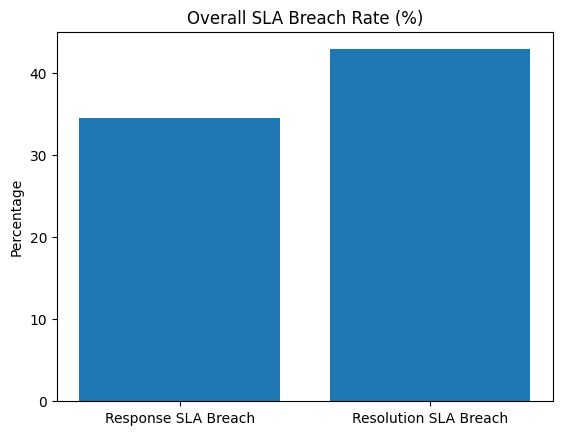

In [62]:
#Overall SLA Breach Rate (KPI Chart)
#SLA Breach Percentage
sla_rates = {
    "Response SLA Breach": base_df["sla_response_breached"].mean() * 100,
    "Resolution SLA Breach": base_df["sla_resolution_breached"].mean() * 100
}

plt.figure()
plt.bar(sla_rates.keys(), sla_rates.values())
plt.title("Overall SLA Breach Rate (%)")
plt.ylabel("Percentage")
plt.show()

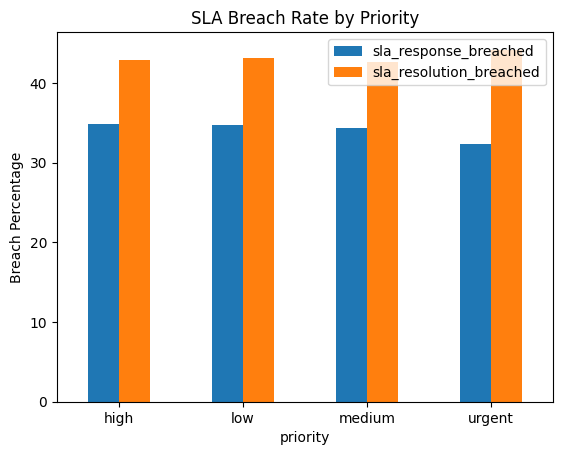

In [63]:
#SLA Breach by Priority
#Priority vs SLA Breach
priority_sla = (
    base_df
    .groupby("priority")[["sla_response_breached", "sla_resolution_breached"]]
    .mean() * 100
)

priority_sla.plot(kind="bar")
plt.title("SLA Breach Rate by Priority")
plt.ylabel("Breach Percentage")
plt.xticks(rotation=0)
plt.show()

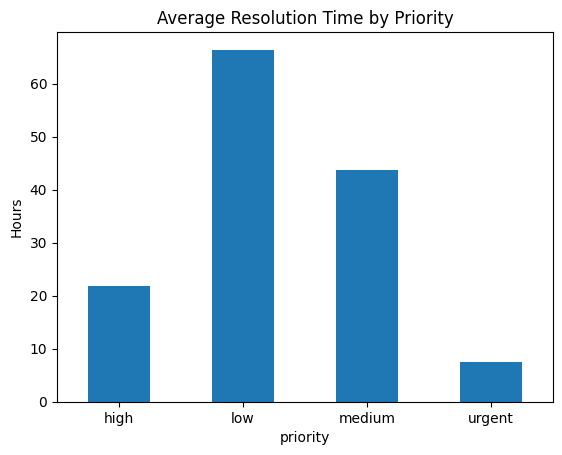

In [64]:
#Average Resolution Time by Priority
#Efficiency Comparison
base_df.groupby("priority")["resolution_time_hours"].mean().plot(kind="bar")
plt.title("Average Resolution Time by Priority")
plt.ylabel("Hours")
plt.xticks(rotation=0)
plt.show()

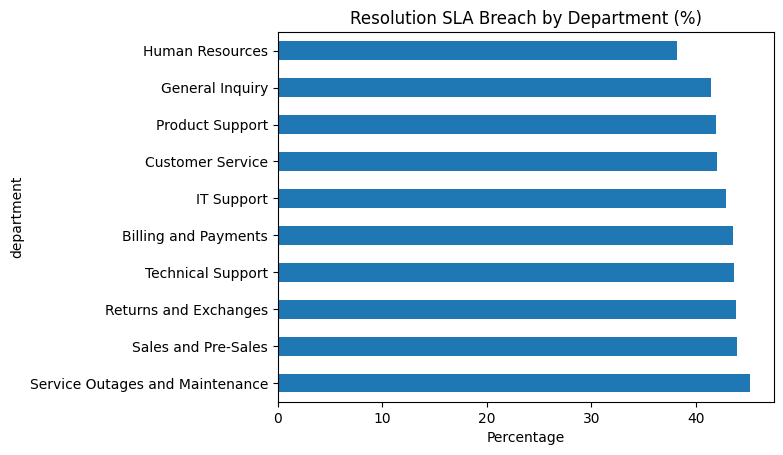

In [65]:
#Department Performance Heat
#SLA Breach by Department
dept_sla = (
    base_df
    .groupby("department")["sla_resolution_breached"]
    .mean()
    .sort_values(ascending=False) * 100
)

dept_sla.plot(kind="barh")
plt.title("Resolution SLA Breach by Department (%)")
plt.xlabel("Percentage")
plt.show()

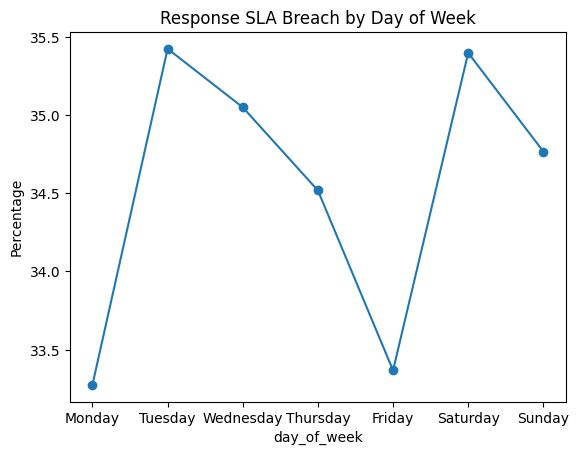

In [66]:
#Time-Based Analysis (Very Powerful)
#SLA Breach by Day of Week
dow_order = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

dow_sla = (
    base_df
    .groupby("day_of_week")["sla_response_breached"]
    .mean()
    .reindex(dow_order) * 100
)

dow_sla.plot(kind="line", marker="o")
plt.title("Response SLA Breach by Day of Week")
plt.ylabel("Percentage")
plt.show()

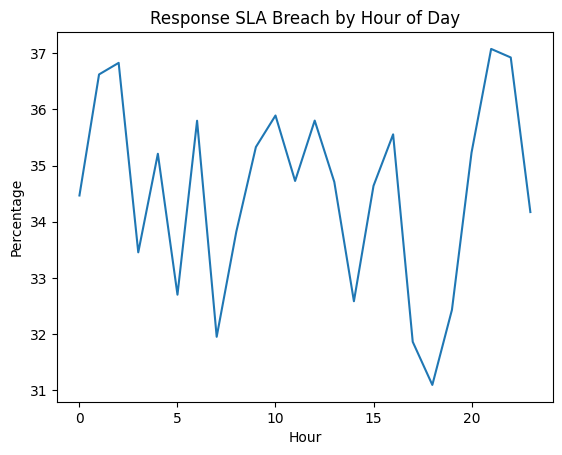

In [67]:
#SLA Breach by Hour of Day
hour_sla = (
    base_df
    .groupby("hour_of_day")["sla_response_breached"]
    .mean() * 100
)

hour_sla.plot(kind="line")
plt.title("Response SLA Breach by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Percentage")
plt.show()

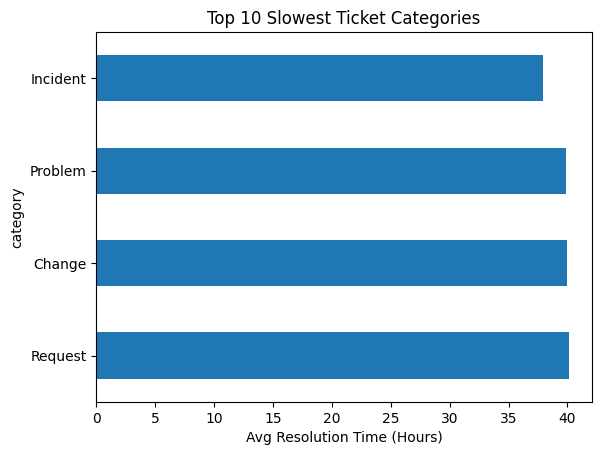

In [68]:
#Category Bottlenecks
#Slowest Categories to Resolve
category_time = (
    base_df
    .groupby("category")["resolution_time_hours"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

category_time.plot(kind="barh")
plt.title("Top 10 Slowest Ticket Categories")
plt.xlabel("Avg Resolution Time (Hours)")
plt.show()